In [1]:
import os
os.chdir("D://Master//10. TFM//Data")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [3]:
df = pd.read_csv("df_minmax.csv")
df.head()

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0.008620,1.00,0.5,0.727273,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.008175,1.00,0.5,0.454545,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.009511,0.75,1.0,0.363636,0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.008620,1.00,0.5,0.636364,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.008620,1.00,0.5,0.636364,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Clustering Jerárquico

In [4]:
subset_df = df.sample(frac=0.2, random_state=42)

In [5]:
hc = AgglomerativeClustering(n_clusters=12, linkage="ward")
cluster_labels = hc.fit_predict(subset_df)

In [6]:
df_total = subset_df.copy()
df_total['cluster'] = cluster_labels


In [7]:
descriptivos_grupos = df_total.groupby(['cluster'],as_index=False).mean()
descriptivos_grupos

,cluster,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0,0.012187,0.794624,0.776273,0.446765,0.433279,0.0,0.0,0.0,0.0,...,0.0,0.345612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.013168,0.831633,0.775875,0.457991,0.449223,0.0,0.0,0.0,0.0,...,0.0,0.352770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.015582,0.794017,0.764740,0.451161,0.465896,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.014180,0.827553,0.786383,0.449710,0.460709,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.016569,0.812086,0.753102,0.456237,0.480218,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5,0.015913,0.809524,0.759317,0.479484,0.466529,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,6,0.013339,0.802123,0.765409,0.456547,0.429350,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.014861,0.790094,0.767010,0.466240,0.470745,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,8,0.012917,0.825490,0.794792,0.443730,0.466157,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,9,0.014640,0.834831,0.782832,0.460948,0.459892,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(subset_df,df_total['cluster'])

In [9]:
silhouette_avg

0.36781683802553156

In [24]:
distance_matrix = pdist(subset_df)
linkage_matrix = linkage(distance_matrix, method='ward')
coph_corr, coph_dist = cophenet(linkage_matrix, distance_matrix)

print(f"Coeficiente de correlación cofenética: {coph_corr}")

Coeficiente de correlación cofenética: 0.6980823238080242


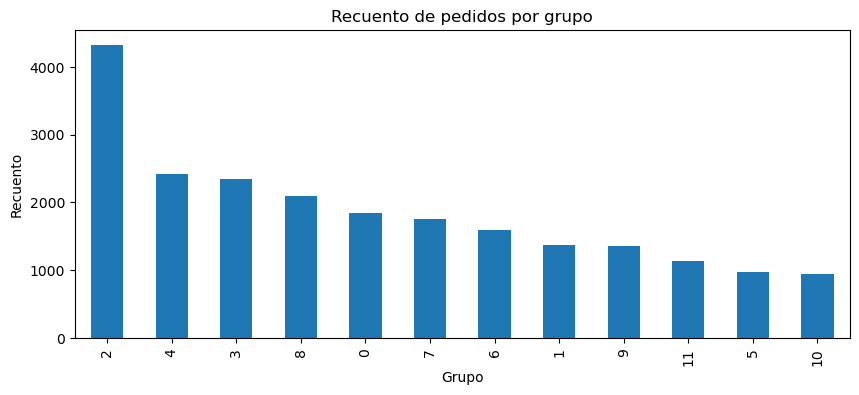

In [25]:
df_total.cluster.value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Recuento de pedidos por grupo')
plt.xlabel('Grupo')
_ = plt.ylabel('Recuento')

In [26]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
target_variance_ratio = 0.95
num_components_for_target_variance = np.argmax(explained_variance_ratio_cumulative >= target_variance_ratio) + 1

Número de componentes para el 95.0% de varianza explicada: 1


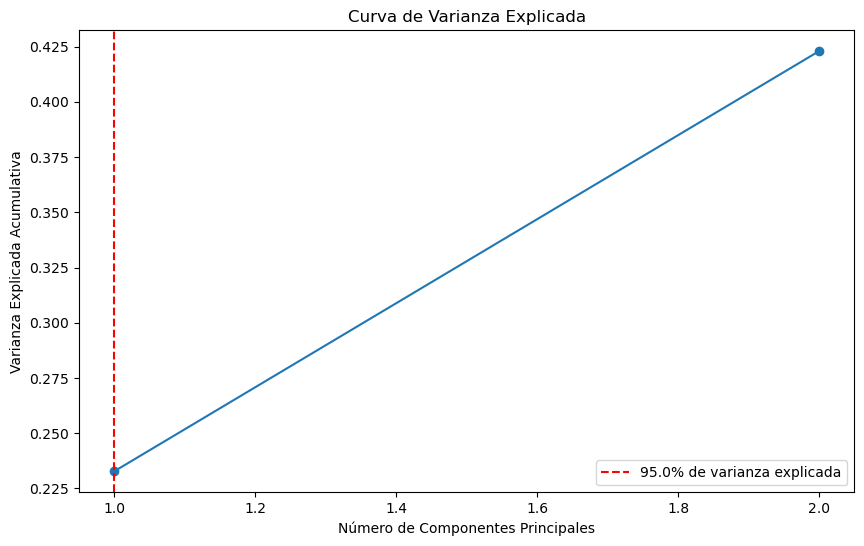

In [27]:
print(f'Número de componentes para el {target_variance_ratio*100}% de varianza explicada: {num_components_for_target_variance}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.axvline(x=num_components_for_target_variance, color='red', linestyle='--', label=f'{target_variance_ratio*100}% de varianza explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Curva de Varianza Explicada')
plt.legend()
plt.show()

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f'Componente {i}: {ratio*100:.2f}% de varianza explicada')

Componente 1: 23.28% de varianza explicada
Componente 2: 19.02% de varianza explicada


In [29]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
for i, ratio_cumulative in enumerate(explained_variance_ratio_cumulative, 1):
    print(f'Acumulado hasta el Componente {i}: {ratio_cumulative*100:.2f}% de varianza explicada')

Acumulado hasta el Componente 1: 23.28% de varianza explicada
Acumulado hasta el Componente 2: 42.29% de varianza explicada


In [30]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(subset_df)

In [31]:
pc_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])
pca_result = pd.concat([pc_df, df_total['cluster'].reset_index(drop=True)], axis=1)

In [32]:
pca_result.head()

,pc1,pc2,cluster
0,0.825510,0.668137,11
1,0.121531,-0.385705,7
2,-0.508810,-0.386882,2
3,0.231790,-0.315719,3
4,0.775034,0.663547,0


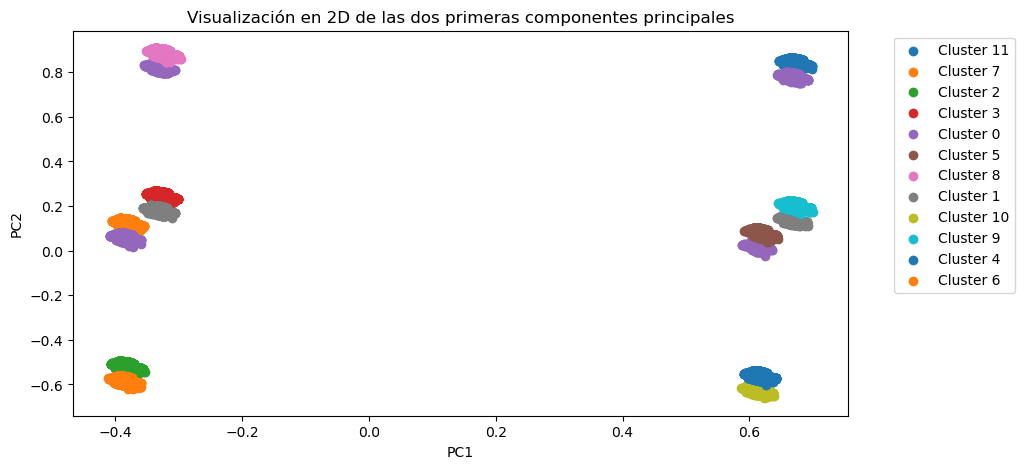

In [33]:
plt.figure(figsize=(10, 5))
for cluster in pca_result['cluster'].unique():
    subset_cluster = pca_result[pca_result['cluster'] == cluster]
    plt.scatter(subset_cluster['pc2'], subset_cluster['pc1'], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización en 2D de las dos primeras componentes principales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

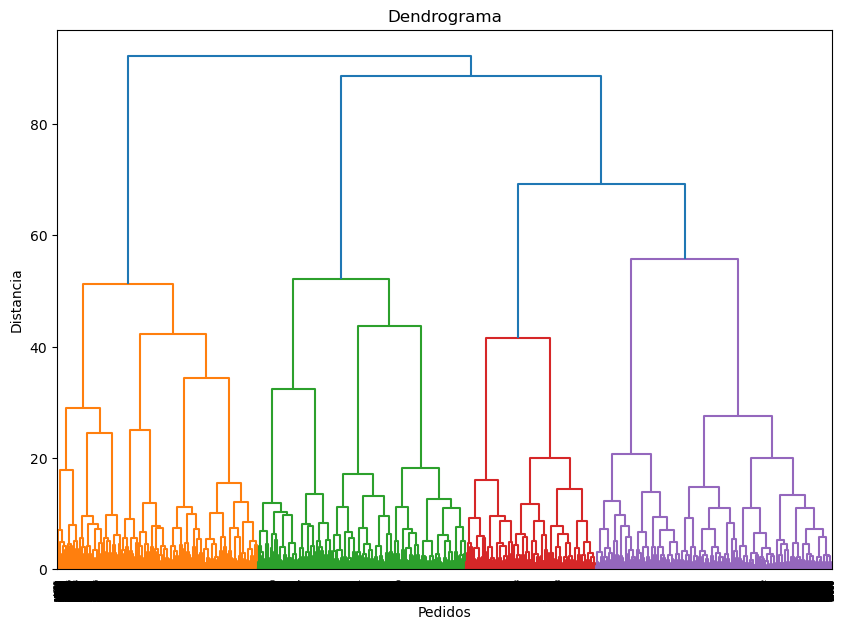

In [18]:
plt.figure(figsize=(10, 7))
dendogram = sch.dendrogram(sch.linkage(subset_df, method="ward"))
plt.title('Dendrograma')
plt.xlabel('Pedidos')
plt.ylabel('Distancia')
plt.show()

<Figure size 1200x800 with 0 Axes>

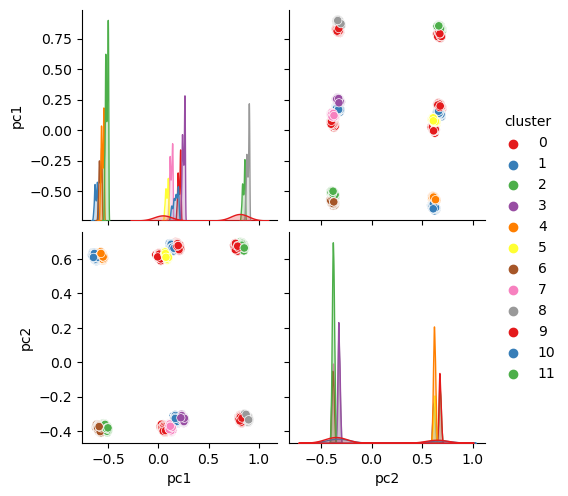

In [19]:
plt.figure(figsize=(12, 8))
sns.pairplot(pca_result, hue='cluster', palette='Set1')
plt.show()

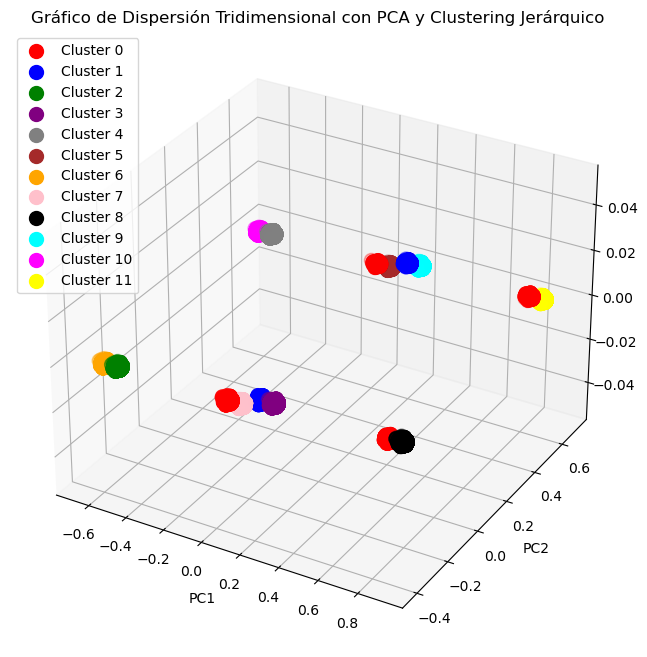

In [21]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a los clusters (ajusta según tu número de clusters)
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'gray', 5: 'brown', 6: 'orange', 7: 'pink', 8: 'black', 9: 'cyan', 10: 'magenta', 11: 'yellow'}

# Crear el gráfico de dispersión tridimensional
for cluster_label, color in colors.items():
    cluster_data = pca_result[pca_result['cluster'] == cluster_label]
    ax.scatter(cluster_data['pc1'], cluster_data['pc2'], c=color, label=f'Cluster {cluster_label}', s=100)

# Ajustar etiquetas y leyenda
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


# Añadir título a cada componente principal
ax.set_title('Gráfico de Dispersión Tridimensional con PCA y Clustering Jerárquico')

# Mostrar el gráfico
plt.legend()
plt.show()